In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [3]:
df = pd.get_dummies(df, columns=['origin'])
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


In [4]:
# x와 y 구분하기
y=df['mpg']
X=df.drop(columns='mpg')

In [5]:

df.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
mpg             float64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

In [6]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'displacement <= 190.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.5, 'horsepower <= 70.5\nsquared_error = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(0.125, 0.16666666666666666, 'squared_error = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(0.375, 0.16666666666666666, 'squared_error = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(0.75, 0.5, 'horsepower <= 127.0\nsquared_error = 13.001\nsamples = 170\nvalue = 16.66'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.026\nsamples = 74\nvalue = 19.438'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.761\nsamples = 96\nvalue = 14.519')]

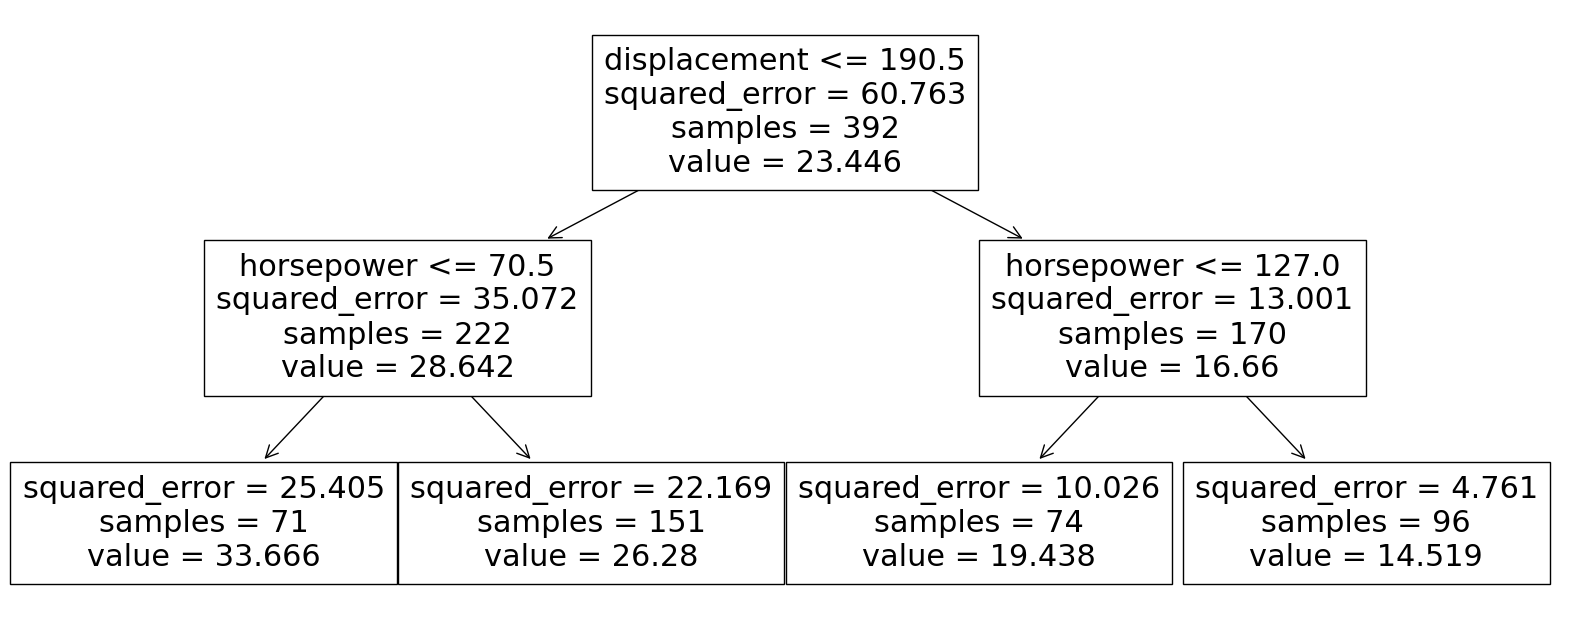

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(reg, feature_names=X.columns)


In [8]:
from sklearn.model_selection import KFold, GridSearchCV

kfold = KFold(n_splits=5, shuffle=True) # 교차검증기
reg = DecisionTreeRegressor() # 학습모델 객체 생성
param_grid = {'max_depth':[2,3,4,5,6,7,8,9,10]} # 하이퍼패러미터의 범위를 딕셔너리 형태로 설정
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=kfold, return_train_score=True, scoring='neg_mean_squared_error')
result = grid_search.fit(X,y)

In [9]:
import pandas as pd
df = pd.DataFrame(result.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000886,0.000861,0.000122,0.000245,2,{'max_depth': 2},-23.229762,-25.232652,-19.739848,-17.908650,...,-20.656054,3.102061,9,-15.554681,-14.020955,-16.525926,-16.955032,-16.355642,-15.882447,1.035471
1,0.001333,0.001989,0.000000,0.000000,3,{'max_depth': 3},-9.799919,-18.550334,-13.741549,-13.803030,...,-13.973939,2.773050,6,-9.534639,-9.075240,-9.009377,-10.303992,-10.132252,-9.611100,0.530427
2,0.001228,0.001758,0.000000,0.000000,4,{'max_depth': 4},-6.077444,-15.783983,-10.232888,-13.282808,...,-11.480517,3.250071,1,-6.511703,-5.616707,-6.600085,-6.808007,-6.820115,-6.471323,0.443529
3,0.002152,0.002087,0.000920,0.001841,5,{'max_depth': 5},-6.941967,-13.499719,-11.891154,-11.355714,...,-11.889572,2.909681,2,-4.759777,-3.603903,-4.253198,-4.479824,-4.552582,-4.329857,0.397445
4,0.000323,0.000646,0.003077,0.003814,6,{'max_depth': 6},-7.699138,-13.871880,-13.758808,-12.462963,...,-12.445167,2.459184,4,-3.136489,-2.363851,-2.687043,-2.913886,-3.020044,-2.824262,0.273736
5,0.001011,0.001326,0.001325,0.002651,7,{'max_depth': 7},-8.764617,-14.041941,-11.616814,-10.323770,...,-12.163907,2.609363,3,-2.081148,-1.385092,-1.487808,-1.712791,-1.883737,-1.710115,0.254117
6,0.001732,0.002177,0.002267,0.002857,8,{'max_depth': 8},-9.582722,-13.821581,-11.881981,-12.721874,...,-12.689323,1.956711,5,-1.044316,-0.823409,-0.849449,-0.954874,-0.956328,-0.925675,0.080171
7,0.005498,0.001578,0.001112,0.001157,9,{'max_depth': 9},-9.517542,-15.042825,-12.856236,-15.230681,...,-14.008303,2.665451,7,-0.515166,-0.407207,-0.489851,-0.509540,-0.583322,-0.501017,0.056519
8,0.000918,0.001389,0.000000,0.000000,10,{'max_depth': 10},-11.840851,-14.901456,-13.573871,-13.177651,...,-14.199654,1.919072,8,-0.197047,-0.175500,-0.185671,-0.270297,-0.404396,-0.246582,0.085655


Text(0, 0.5, 'mean_squared_error')

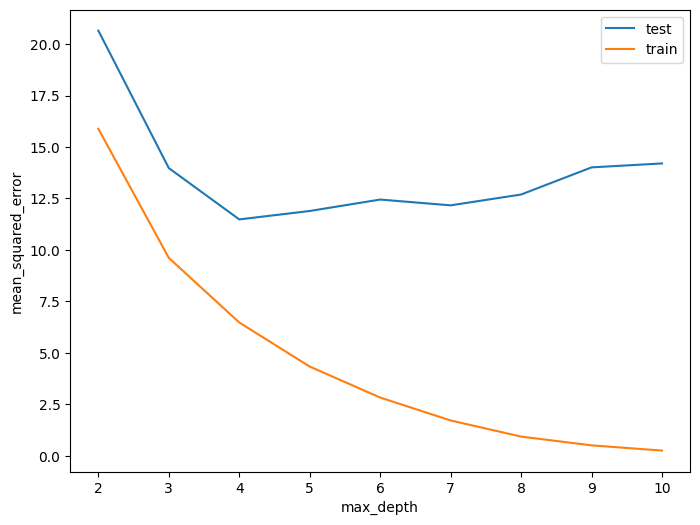

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(df['param_max_depth'], -df['mean_test_score'], label='test')
plt.plot(df['param_max_depth'], -df['mean_train_score'], label='train')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel('mean_squared_error')

In [11]:

result.best_score_, result.best_params_

(-11.48051712237072, {'max_depth': 4})

In [12]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')
df=df.dropna()

In [13]:

df = pd.get_dummies(df, columns=['Sex','AHD','ChestPain','Thal'])
df

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,Sex_1,AHD_No,AHD_Yes,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,145,233,1,2,150,0,2.3,3,0.0,...,1,1,0,0,0,0,1,1,0,0
1,67,160,286,0,2,108,1,1.5,2,3.0,...,1,0,1,1,0,0,0,0,1,0
2,67,120,229,0,2,129,1,2.6,2,2.0,...,1,0,1,1,0,0,0,0,0,1
3,37,130,250,0,0,187,0,3.5,3,0.0,...,1,1,0,0,1,0,0,0,1,0
4,41,130,204,0,2,172,0,1.4,1,0.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,0,0,123,1,0.2,2,0.0,...,0,0,1,1,0,0,0,0,0,1
298,45,110,264,0,0,132,0,1.2,2,0.0,...,1,0,1,0,0,0,1,0,0,1
299,68,144,193,1,0,141,0,3.4,2,2.0,...,1,0,1,1,0,0,0,0,0,1
300,57,130,131,0,0,115,1,1.2,2,1.0,...,1,0,1,1,0,0,0,0,0,1


In [14]:

y = df['AHD_Yes']
X = df.drop(columns=['AHD_Yes','AHD_No'])

In [15]:
param_grid = { 
    'max_depth' : [2,3,4,5,6,7,8,9,10],    
}

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

kfold=KFold(n_splits=5, shuffle=True)
clf = DecisionTreeClassifier()
grid=GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=kfold, return_train_score=True)

In [17]:
result = grid.fit(X,y)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(result.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003897,0.003720,0.000206,0.000412,2,{'max_depth': 2},0.766667,0.700000,0.644068,0.627119,...,0.706893,0.066303,9,0.763713,0.776371,0.815126,0.798319,0.764706,0.783647,0.020076
1,0.001624,0.001990,0.001674,0.002308,3,{'max_depth': 3},0.816667,0.850000,0.728814,0.745763,...,0.784181,0.044608,1,0.860759,0.843882,0.861345,0.861345,0.861345,0.857735,0.006930
2,0.001105,0.001363,0.001677,0.003297,4,{'max_depth': 4},0.766667,0.783333,0.711864,0.745763,...,0.760847,0.029817,2,0.902954,0.877637,0.886555,0.907563,0.894958,0.893933,0.010846
3,0.001221,0.001495,0.002013,0.002466,5,{'max_depth': 5},0.750000,0.700000,0.677966,0.796610,...,0.744237,0.048719,6,0.936709,0.936709,0.924370,0.928571,0.928571,0.930986,0.004918
4,0.000000,0.000000,0.003846,0.002372,6,{'max_depth': 6},0.766667,0.716667,0.711864,0.694915,...,0.740734,0.043562,8,0.966245,0.962025,0.962185,0.945378,0.945378,0.956242,0.008999
5,0.002134,0.001921,0.001024,0.002049,7,{'max_depth': 7},0.733333,0.733333,0.745763,0.728814,...,0.747571,0.025161,4,0.987342,0.991561,0.987395,0.991597,0.978992,0.987377,0.004596
6,0.002993,0.001992,0.000426,0.000852,8,{'max_depth': 8},0.750000,0.766667,0.728814,0.728814,...,0.750791,0.020259,3,0.995781,0.995781,0.991597,1.000000,1.000000,0.996632,0.003146
7,0.000602,0.001204,0.000740,0.001219,9,{'max_depth': 9},0.766667,0.750000,0.711864,0.745763,...,0.747401,0.019380,5,0.995781,0.995781,1.000000,1.000000,1.000000,0.998312,0.002067
8,0.001112,0.002225,0.003419,0.003251,10,{'max_depth': 10},0.750000,0.716667,0.728814,0.745763,...,0.744181,0.021393,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


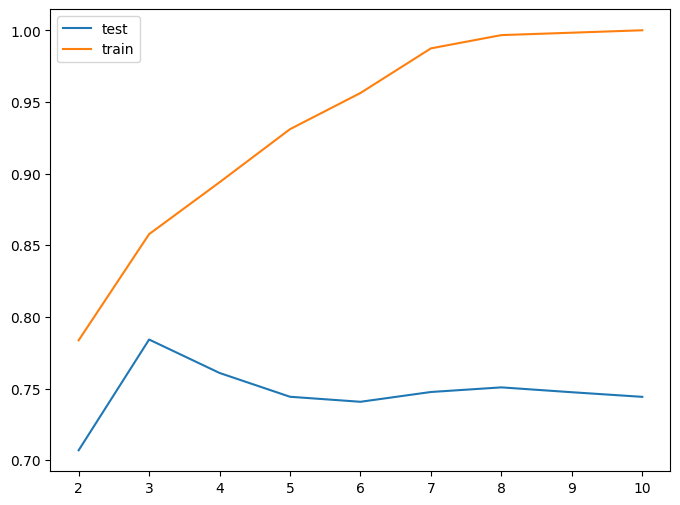

In [19]:

plt.figure(figsize=(8,6,))
plt.plot(df['param_max_depth'], df['mean_test_score'], label='test')
plt.plot(df['param_max_depth'], df['mean_train_score'], label='train')
plt.legend()

In [20]:

result.best_score_, result.best_params_

(0.784180790960452, {'max_depth': 3})